<p style="font-family: Arial; font-size:2.5em;color:crimson;">
    <b>1) Libraries and Dataset</b> 
 </p>

## Import Libraries

In [1]:
%matplotlib inline
## General Libraries and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pgeocode 
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
## Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score

## Import and Read Dataset

In [2]:
df = pd.DataFrame(pd.read_csv('C:/Users/Gagan Sharma/OneDrive/Desktop/Data/Bank_Loan_Granting.csv'))
df     

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


### Samples
    - This dataset has 5000 sample in 14 columns.
### Features :
     ID : customer ID
     Age : age of customer
     Experience : the number of years that customer has experience
     Income : the customer's annual earnings
     ZIP Code : the postal code of customer's location
     Family : the number of people in customer's family
     CCAvg : the average of monthly credit card spending
     Education : the level of customer's Education(undergraduate,graguate,professional)
     Mortgage : the Value of customer's mortgage(thing that the customer uses it as a guarantee to the bank)
     Securities Account : the customer has a security account or not(it's also known as an investment account)
     CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest on a 
     fixed amount of money for a fixed period of time)
     Online : the customer uses the bank's online services or not
     CreditCard : the customer uses the bank's credit card or not
### Target
    - Personal Loan : the customer is granted loans or not

<p style="font-family: Arial; font-size:2.5em;color:crimson;">
    <b>2) Data cleaning</b> 
 </p>

## data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


## Checking missing values

In [4]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

    - There is not any null value(missing value).

## Convert an object column to numerical column
    -This column is numeric inherently, but it is stored in an object type, and we have to convert it to a numeric type for processing.

In [5]:
df['CCAvg'] = df['CCAvg'].str.replace("/" , '.').astype(np.float64)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Checking duplicated data

In [7]:
print('Number of duplicated data : ' , len(df[df.duplicated()]))

Number of duplicated data :  0


    As we see, there is not any duplicated data.

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


    - As shown in this description, there are negative values in the 'Experience' feature. Because experience is a number of years, it can't be negetive and must be correct.

## Replace negetive values of Exprience with Absolute of them

In [9]:
df['Experience'] = df['Experience'].abs()
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Convert annual Income to monthly Income
    - Income is 'annual' earnings and CCAvg is 'monthly' spending money. We want them to be in a common range of time, so we convert annual income to monthly income by dividing it by 12.

In [10]:
df['Income'] = df['Income']/12
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0


## Remove a useless column

In [11]:
df = df.drop(['ID'],axis=1)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0


## The Target Overview

************************************************************************************************************************
number of customers :  5000
The number of Personal Loan = 0 :  4520
The number of Personal Loan = 1 :  480
************************************************************************************************************************


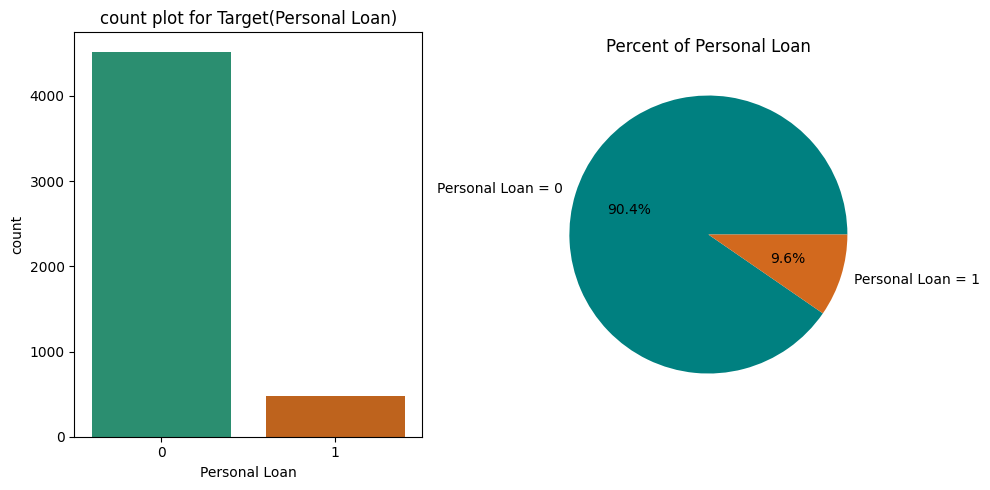

In [12]:
print('*'*120)
print('number of customers : ',df.shape[0])
print('The number of Personal Loan = 0 : ',df['Personal Loan'].value_counts()[0])
print('The number of Personal Loan = 1 : ',df['Personal Loan'].value_counts()[1])
print('*'*120)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Personal Loan',palette = "Dark2")
plt.title("count plot for Target(Personal Loan)")
plt.subplot(1,2,2)
plt.pie([df['Personal Loan'].value_counts()[0],df['Personal Loan'].value_counts()[1]],
        labels=['Personal Loan = 0','Personal Loan = 1'],autopct='%1.1f%%',colors=['teal','chocolate'])
plt.title("Percent of Personal Loan")
plt.tight_layout()
plt.show()

    - As seen above, we deal with an imbalance dataset(one class has significantly more samples than another) in target, the majority is class 0 with 90.4% of customers and the minority is class 1 with 9.6% of customers.

## There are some descrete and some continues features in this dataset
    - ZIP Code is a discrete or categorical feature. Because it has a lot of categories, we analyze it separately.

In [13]:
descrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
continuous_col = df[['Age','Experience','Income','CCAvg','Mortgage']]

Family :  [4 3 1 2]
Education :  [1 2 3]
Securities Account :  [1 0]
CD Account :  [0 1]
Online :  [0 1]
CreditCard :  [0 1]


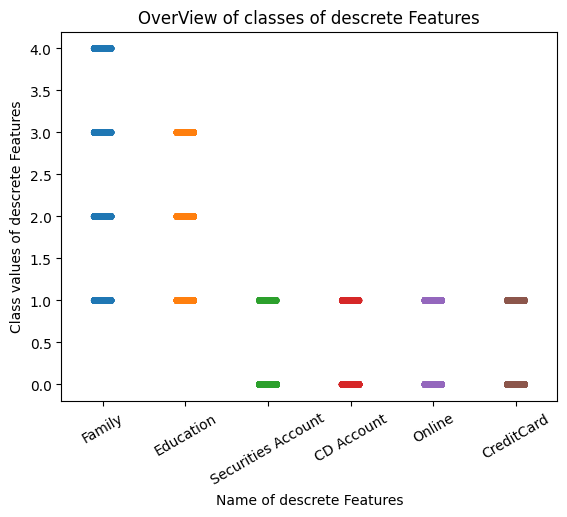

In [14]:
for col in descrete_col :
    print('%s : ' %col , df[col].unique())
    
ax = sns.stripplot(data=descrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Features')
plt.show()

#### As shown above there are 7 features which are descrete
    - Family is a multinomial feature and it can be included 1 person at least and 4 persons at most : [1,2,3,4]
    - Education is another multinomial feature and it can be in 3 levels : [1,2,3]
    - the rest 4 features are binary features and are 0/1 means No/Yes



************************************************************************************************************************


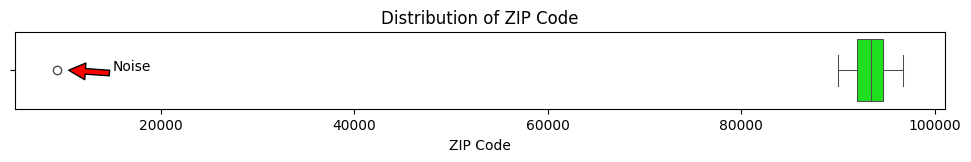

The number of categories in ZIP Code is :  467
There is a noise in zipcode feature, it is the smallest value of it :


,ZIP Code
384,9307
652,90005
1469,90005


The range of ZIP Code without this noise is : (90005 , 96651)


In [15]:
print('\n')
print('*'*120)

plt.figure(figsize=(12,1))
ax = sns.boxplot(x=df['ZIP Code'],color="lime", linewidth=.75)
plt.annotate('Noise',xy=(10500,0),xytext=(15000,0),arrowprops=dict(facecolor='red'))
ax.set_title('Distribution of ZIP Code')
plt.show()

fig = px.strip(df[df["ZIP Code"]>80000],
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 Must Be Checked\n for analysis",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])
       
fig.show()

print('The number of categories in ZIP Code is : ',len(df['ZIP Code'].unique()))
print('There is a noise in zipcode feature, it is the smallest value of it :')
display(df['ZIP Code'].nsmallest(3).to_frame())
print('The range of ZIP Code without this noise is : (%d , %d)'%(df[df['ZIP Code']>80000]['ZIP Code'].min(),
                                           df[df['ZIP Code']>80000]['ZIP Code'].max()))

    - As we see in the box plot, the smallest value of ZIP Code is a number that includes 4 digits, but the rest of them have 5 digits. Also, all values of ZIP Code are in a limit range(90005,96651), but this point is out of this range and really far away from it. In addition, I found out from searching on the internet that this code is invalid because zip codes in the United States have 5 digits or 9 digists. So this point is a noise.
    - We show in the stripplot that the value of Personal Loan for any zipcode can be 0 and 1, except for zipcode 96561, where all values of Personal Loan are 0. It means that the value of Personal Loan is not dependent on a zip code.

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.000000,35.00,45.000000,55.000000,67.000000
Experience,5000.0,20.134600,11.415189,0.000000,10.00,20.000000,30.000000,43.000000
Income,5000.0,6.147850,3.836144,0.666667,3.25,5.333333,8.166667,18.666667
CCAvg,5000.0,1.937938,1.747659,0.000000,0.70,1.500000,2.500000,10.000000
Mortgage,5000.0,56.498800,101.713802,0.000000,0.00,0.000000,101.000000,635.000000


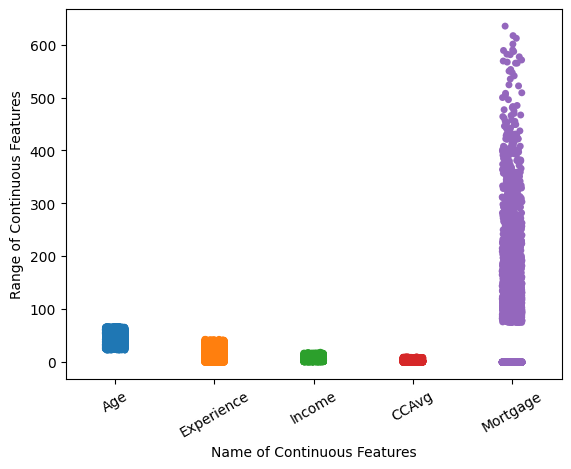

In [16]:
display(continuous_col.describe().T)
ax = sns.stripplot(data=continuous_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Range of Continuous Features')
plt.xlabel('Name of Continuous Features')
plt.show()

#### As shown and described here there are 5 continuous features 
    - Age of customers is in range(23-67)
    - Customers have experience at most 43 years
    - Income is in range (0.67-18.66) monthly
    - CCAvg value is 10 in maximum
    - as seen above there are not Mortgage between 0 and 75, its values are 0 or in range(75,635), also we can see the most values are in range(75,400) 

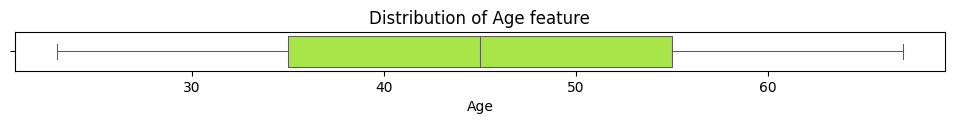

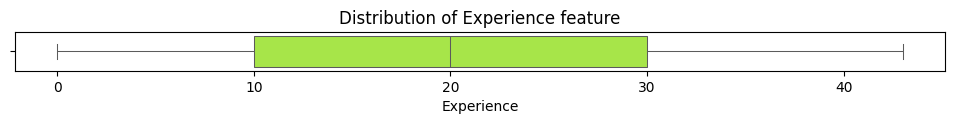

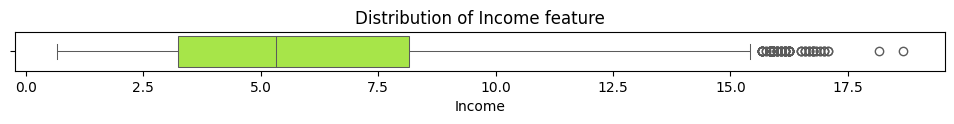

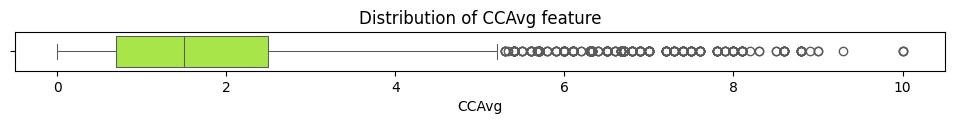

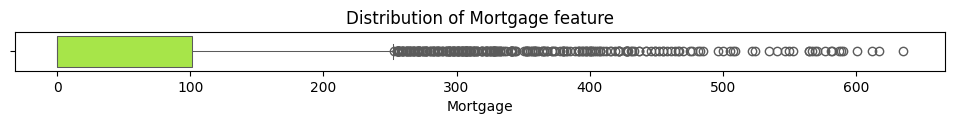

In [17]:
for col in continuous_col.columns:
    plt.figure(figsize=(12,0.5))
    ax = sns.boxplot(x=df[col],color="greenyellow", linewidth=.75)
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

    - As shown in these box plots, in two features, Age and Experience, the distribution of data is normal; in other features, we see some out-of-range points. Because they are about the amount of money or the value of a mortgage, they can be any amount, and all of them are reasonable, so they can't be noises.

## Remove the noise
    - As mentioned above, the ZIP Code column doesn't have a significant effect on determining Personal Loan and we can remove it from our dataset for modeling, but we need it for visualization and extracting some information. So, we create a copy of the final clean dataset (df) named df1, remove the noise from it, and insert important columns (like latitude, longitude, and so on) into it. Finally, we remove the ZIP Code column from clean data (df) for our modeling.
    
## df is final clean data

In [18]:
## df1 is just for visualizations related to zipcodes
df1 = df.copy()
df = df.drop(['ZIP Code'],axis=1)
df1.drop(index=384,inplace=True)
df1.reset_index(drop=True, inplace =True)
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0
4995,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0
4996,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0
4997,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0


## Insert Latitude, Longitude, County and Place name to df1 according to zipcode

In [19]:
nomi = pgeocode.Nominatim('us')
df2 = []
df3 = []
df4 = []
df5 = []

for zipCode in df1['ZIP Code'] :
    a = nomi.query_postal_code(zipCode)
    df2.append(a['latitude'])
    df3.append(a['longitude'])
    df4.append(a['county_name'])
    df5.append(a['place_name'])
    
df1['Lat'] = pd.DataFrame(df2)
df1['Lon'] = pd.DataFrame(df3)
df1['County'] = pd.DataFrame(df4)
df1['Place'] = pd.DataFrame(df5)
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Lat,Lon,County,Place
0,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0,34.1510,-118.0889,Los Angeles,Pasadena
1,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0,33.7866,-118.2987,Los Angeles,Los Angeles
2,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0,37.8738,-122.2549,Alameda,Berkeley
3,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0,37.7195,-122.4411,City and County of San Francisco,San Francisco
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1,34.2283,-118.5368,Los Angeles,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0,33.6485,-117.8387,Orange,Irvine
4995,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0,32.8455,-117.2521,San Diego,La Jolla
4996,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0,34.4451,-119.2565,Ventura,Ojai
4997,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0,34.0290,-118.4005,Los Angeles,Los Angeles


In [20]:
df1.describe(include='all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Lat,Lon,County,Place
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4959.000000,4959.000000,4959,4959
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,244
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,Los Angeles
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,375
mean,45.337267,20.133627,6.148730,93169.275455,2.396079,1.938206,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859,35.786663,-120.038983,NaN,NaN
std,11.464033,11.416124,3.836023,1759.630610,1.147554,1.747731,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574,2.105600,2.090673,NaN,NaN
min,23.000000,0.000000,0.666667,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.562600,-124.159300,NaN,NaN
25%,35.000000,10.000000,3.250000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.953300,-122.138800,NaN,NaN
50%,45.000000,20.000000,5.333333,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.385500,-119.861200,NaN,NaN
75%,55.000000,30.000000,8.166667,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.750900,-118.085700,NaN,NaN


In [21]:
df1[df1['Lat'].isna()]['ZIP Code'].unique()

array([92717, 92634, 96651, 92709], dtype=int64)

    - There are 4 unknown zipcodes in the ZIP Code column categories that lead to creating NaN in the Lat, Lon, County, and Place columns. We have to check them and find their information separately.

In [22]:
miss_zipcodes = [92717,92634,92709]
miss_zipcodes_info = [[33.6462,-117.8397,'Orange','Irvine'],[33.8739,-117.9028,'Orange','Fullerton']
                      ,[33.67,-117.73,'Orange','Irvine']]

for i,zcode in enumerate(miss_zipcodes) :
    for j,info in enumerate(['Lat','Lon','County','Place']) :
        df1.loc[df1['ZIP Code']==zcode,info]=miss_zipcodes_info[i][j]

    - We can just find information of 3 unknown zipcodes by searching on the internet and replacing information of them. So we remove the rest of the missing zipcodes(zipcode=96651). 
    - As seen before on the strip plot of the ZIP Code vs. Personal Loan, we annotated that 'zip codes 96561 must be checked', and as we see here, zipcodes 96651 are unknown and finally removed.

In [23]:
df1.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   6
Lon                   6
County                6
Place                 6
dtype: int64

    - These 6 missing values are information of unkmown zipcode 96651. 

In [24]:
df1 = df1.dropna()
display(df1.isna().sum())
display(df1)

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   0
Lon                   0
County                0
Place                 0
dtype: int64

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Lat,Lon,County,Place
0,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0,34.1510,-118.0889,Los Angeles,Pasadena
1,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0,33.7866,-118.2987,Los Angeles,Los Angeles
2,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0,37.8738,-122.2549,Alameda,Berkeley
3,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0,37.7195,-122.4411,City and County of San Francisco,San Francisco
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1,34.2283,-118.5368,Los Angeles,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0,33.6485,-117.8387,Orange,Irvine
4995,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0,32.8455,-117.2521,San Diego,La Jolla
4996,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0,34.4451,-119.2565,Ventura,Ojai
4997,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0,34.0290,-118.4005,Los Angeles,Los Angeles


In [25]:
fig = px.strip(df1,
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 have been removed as unknown zipcodes",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])
       
fig.show()

<p style="font-family: Arial; font-size:2.5em;color:crimson;">
    <b>3) Data analysis and visualization</b> 
 </p>

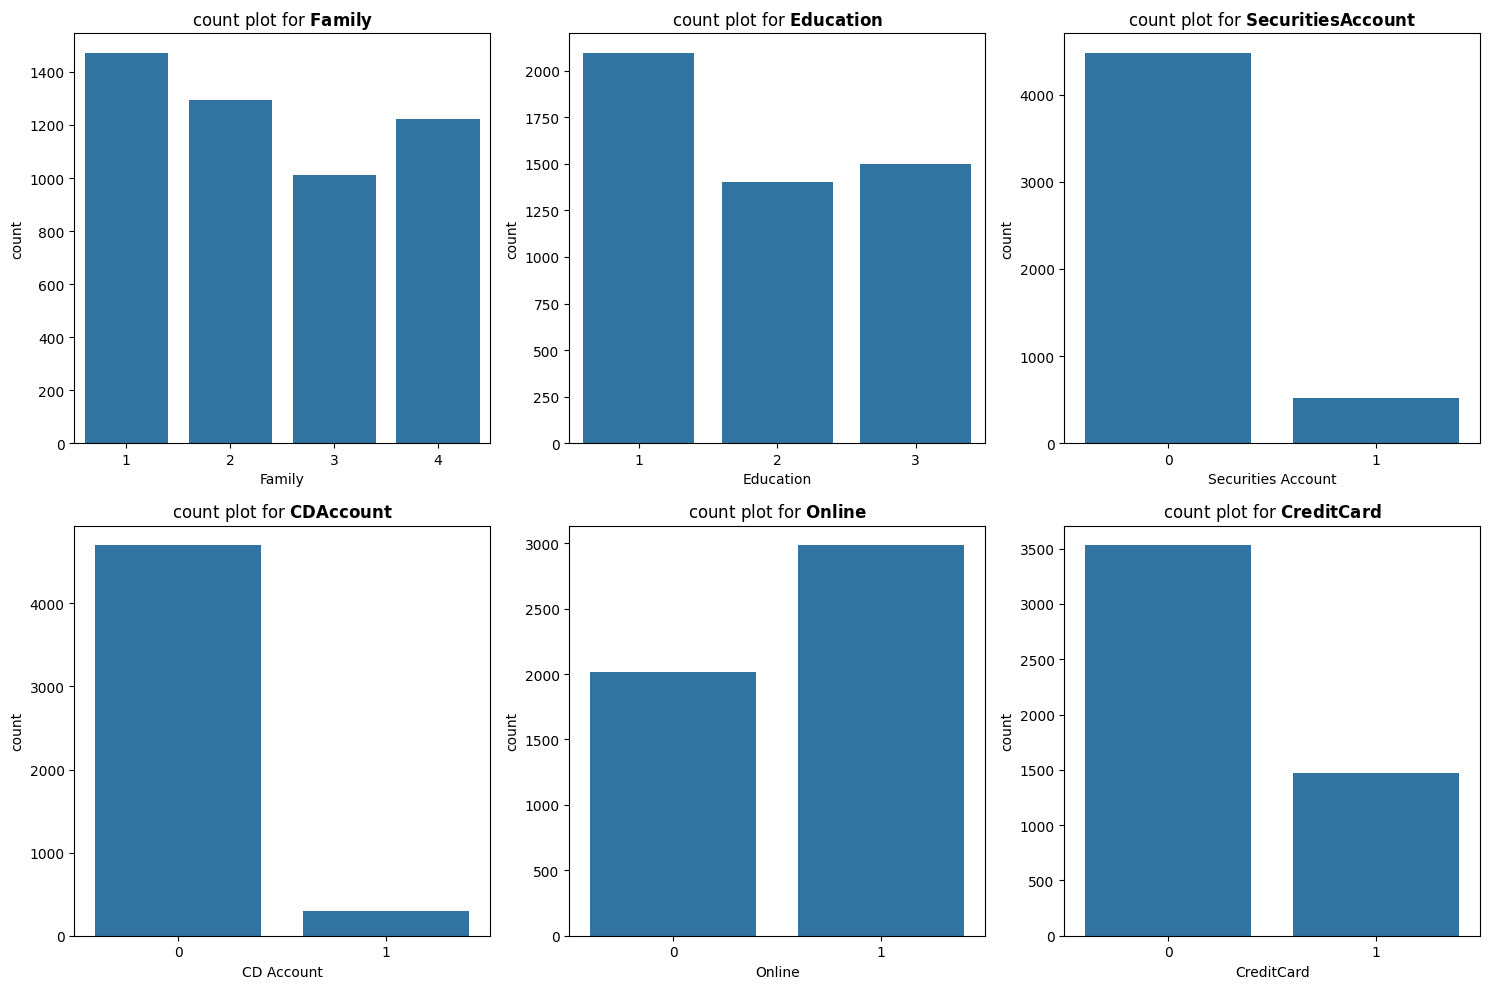

************************************************************************************************************************
Descrete columns name : 
 ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Descrete columns categories : 
 [[4, 3, 1, 2], [1, 2, 3], [1, 0], [0, 1], [0, 1], [0, 1]]
Descrete columns categories count : 
 [[1222, 1010, 1472, 1296], [2096, 1403, 1501], [522, 4478], [4698, 302], [2016, 2984], [3530, 1470]]


************************************************************************************************************************


In [26]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"count plot for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()
#############################################################
descrete_cols_categories=[]
descrete_cols_categories_count=[]

for col in list(descrete_col.columns):
    pie_name1=[]
    pie_value1=[]
    for j in range(len(descrete_col[col].unique())) :
        pie_name1.append(descrete_col[col].unique()[j])
        pie_value1.append(descrete_col[descrete_col[col]==pie_name1[j]][col].count())
    descrete_cols_categories.append(pie_name1)
    descrete_cols_categories_count.append(pie_value1)

print('*'*120)
print('Descrete columns name : \n' , list(descrete_col.columns))
print('Descrete columns categories : \n' , descrete_cols_categories)   
print('Descrete columns categories count : \n' , descrete_cols_categories_count)
print('\n')
print('*'*120)
#############################################################
rows = 3
cols = 2

# Create subplots
fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}],
                                           [{"type": "pie"}, {"type": "pie"}]])


for i in range(rows * cols) :
    fig.add_trace(go.Pie(labels=descrete_cols_categories[i], values=descrete_cols_categories_count[i], name=descrete_col.columns[i]),
                  row=int(np.ceil((i+1)/2)), col=(i%2)+1)


fig.update_layout(margin=dict(t=35, b=35, l=35, r=35))
fig.update(layout_title_text='Percent Of values in descrete columns',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

### these charts show the count and percent of descrete columns' values
     You can see each descrete column name, its categories, number, and percent of customers in any category by putting up your mouse cursor at each part of any pie chart.
    - in the number of customers' families, customers with 1 person family have the most number of customers(29.4% of all customers) and with 3 persons family has the lowest number of them(20.2% of all customers).
    - in the customers' education, most customers are undergraduate(41.9%).
    - Most customers don't have Securities Account(89.6%)
    - Just a few customers have CD Account and most of them don't have
    - More than half of customers use Online services(59.7%)
    - Just 29.4% of customers use credit card and most of them don't use

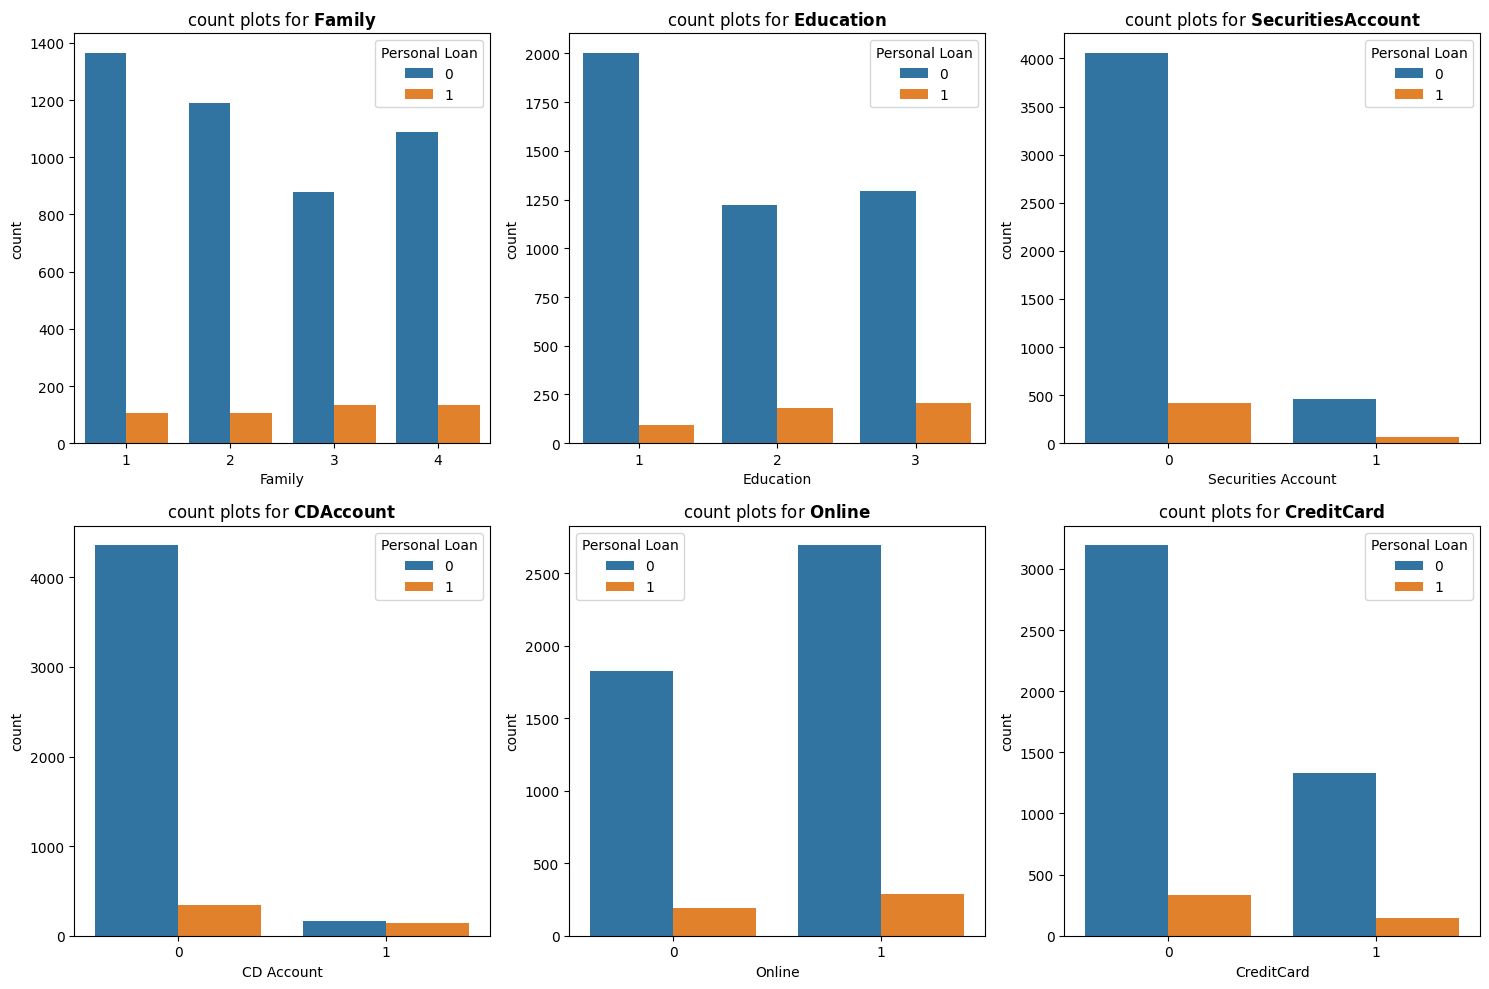

In [27]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col,hue='Personal Loan')
    plt.title(f"count plots for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()

### These plots show counts of customers who were granted loans based descrete features.
    - As seen above, most customers are with 1 person families, but 3 and 4 person families are granted loans more than others.
    - The education of most customers is undergraduate, but graduate and professional customers are granted loans more than others.
    - Most customers who were granted loans didn't have a securities account, which highlights the importance of different features in increasing the chance of being granted loans.
    - Also, Most customers who were granted loans didn't have a CD Accounts.
    - Most customers who were granted loans didn't use a Credit Card.
    - Most customers who were granted loans used Online services.
    
 ### One important factor in data analizing is ratio of target on each category of each column
 #### Note : ratio = (number of customers with personal loan = 1 in each category)/(number of all customers in that category)
    - In the CD account feature, the ratio of customers who had CD accounts and were granted loans is 46.36%. Also, the ratio of customers who didn't have CD accounts and were granted loans is 7.2%. So, we conclude that having CD accounts increases the chance of being granted loans.
    - In Securities account, online, and CreditCard columns, these two ratios are almost close together, which means the importance of other features in increasing the chance of being granted loans besides these feature.

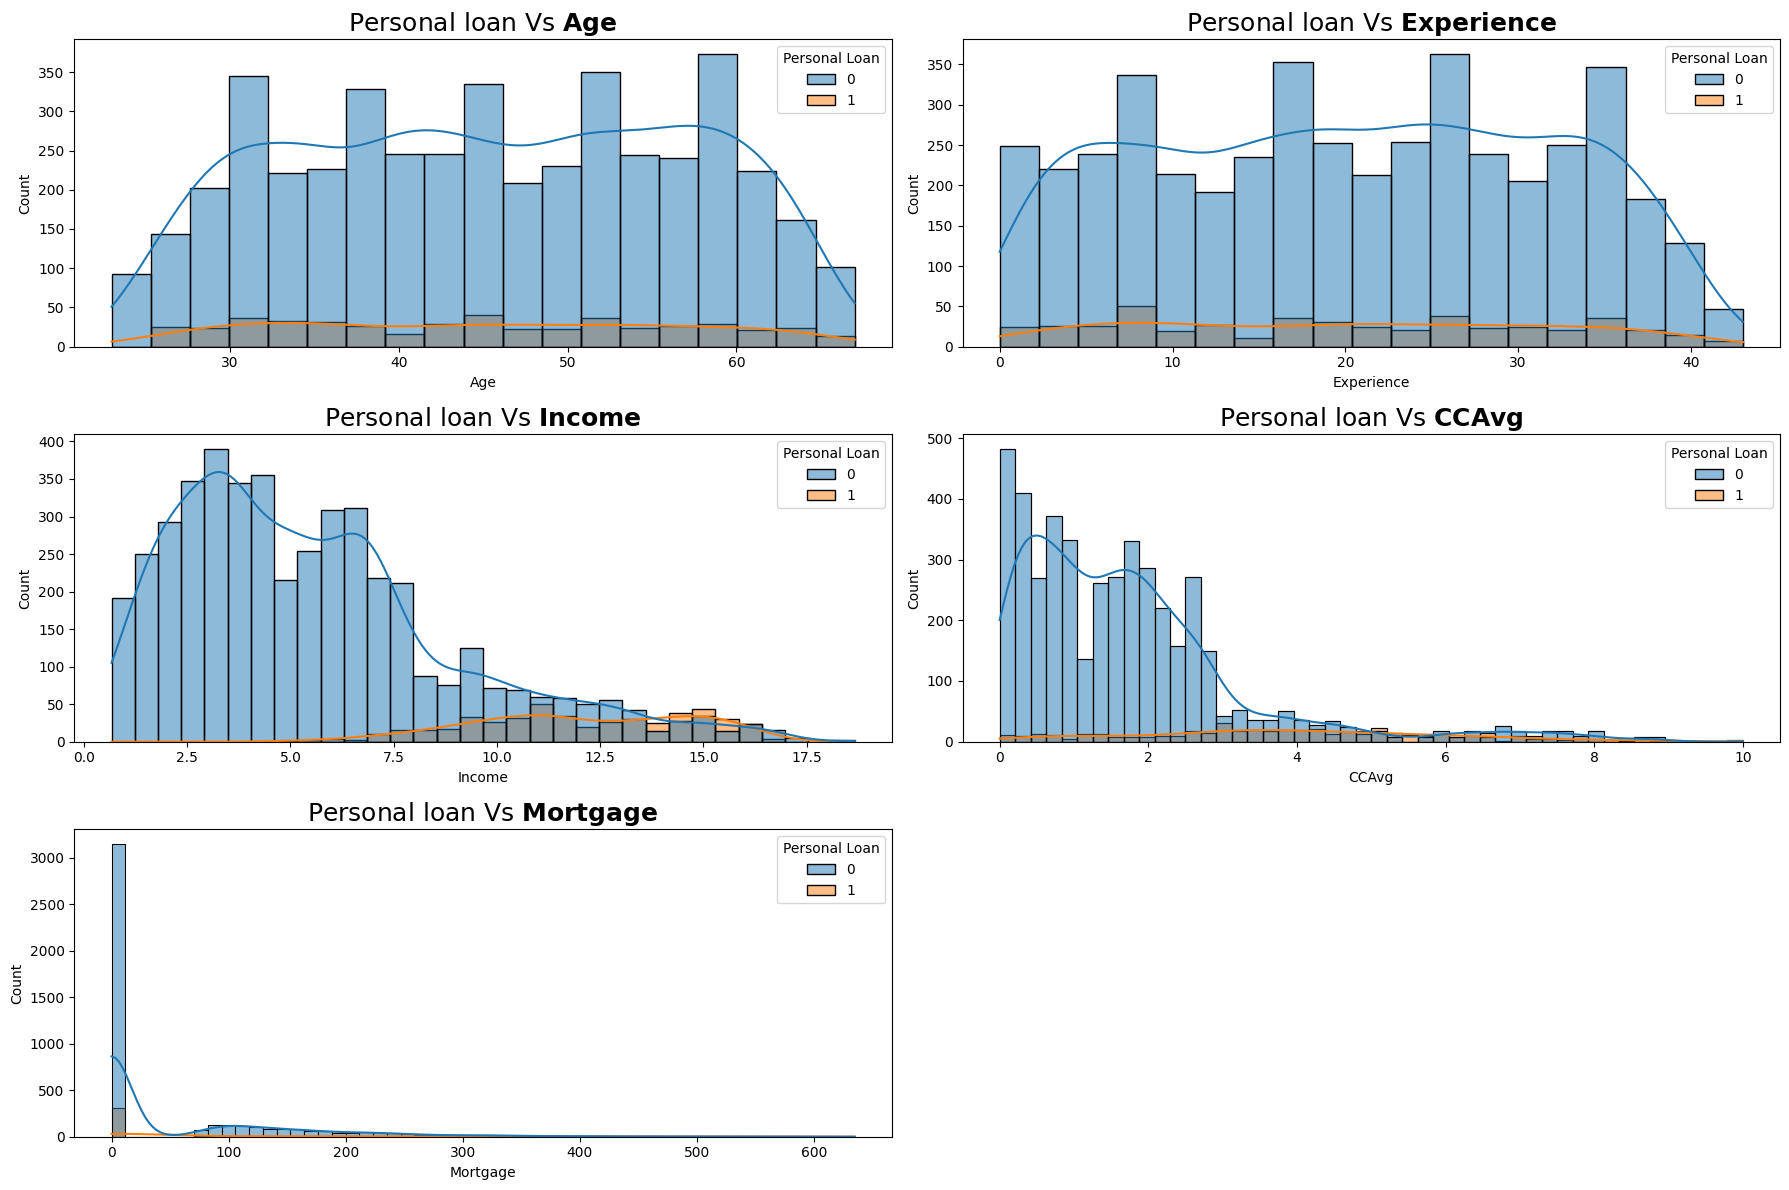



************************************************************************************************************************


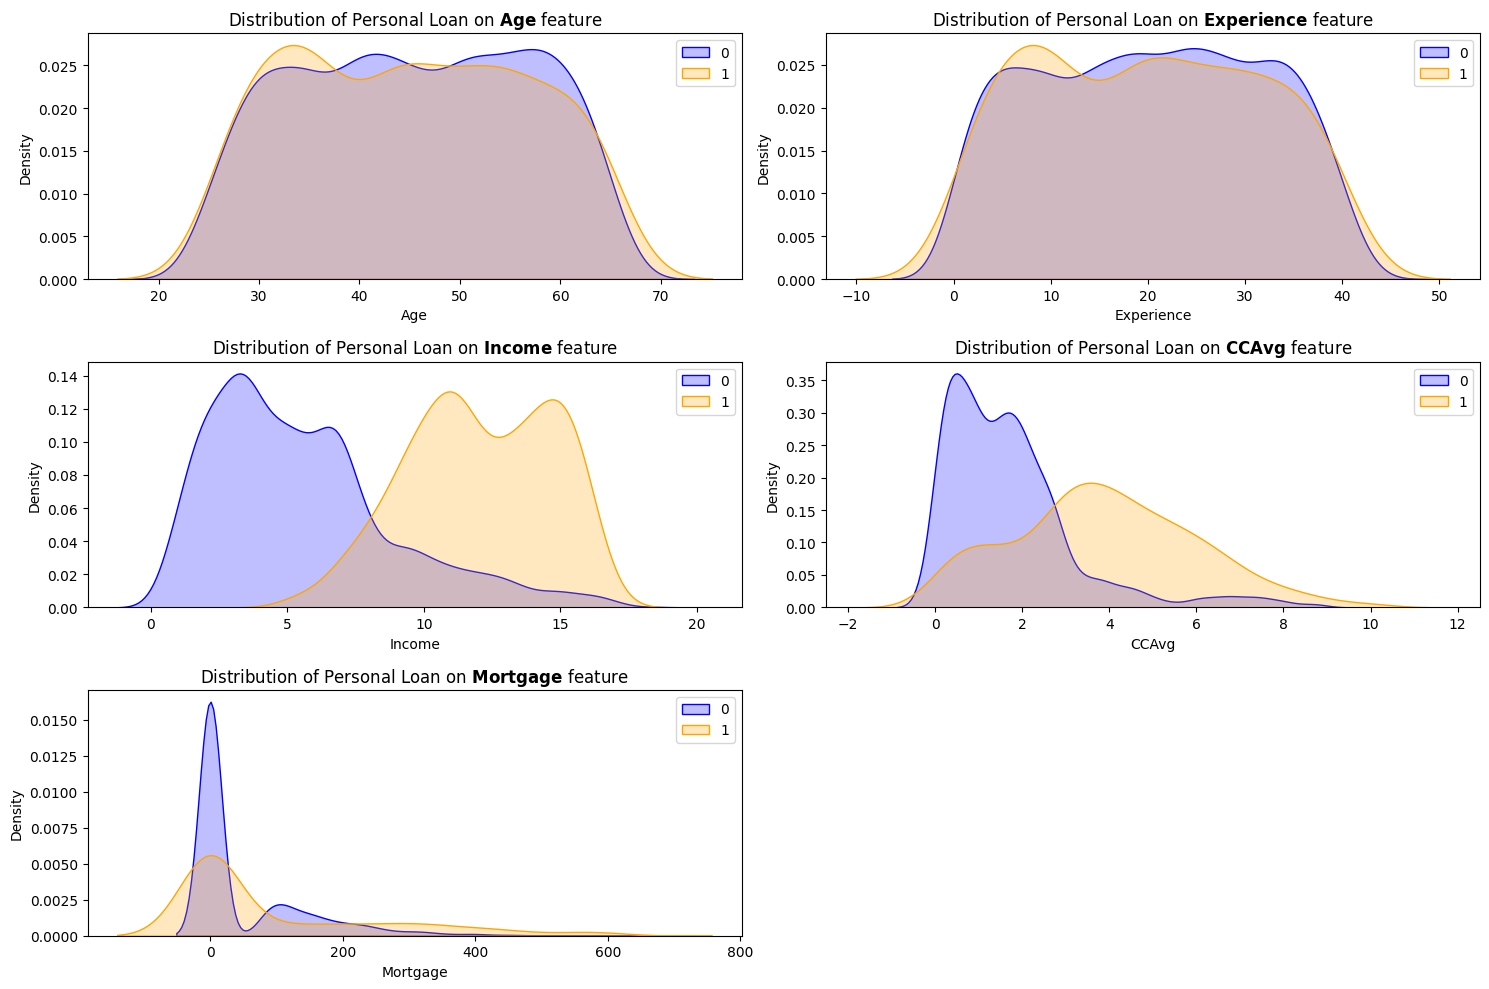

In [28]:
plt.figure(figsize=(18,12))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[col],hue = df['Personal Loan'],kde=True)
    plt.title(f"Personal loan Vs $\\mathbf{{{col}}}$",fontsize=18)

plt.tight_layout()
plt.show()

#############################################################################
print('\n')
print('*'*120)

plt.figure(figsize=(15,10))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    color=['blue','orange']
    for j in list(df['Personal Loan'].unique()) :
        sns.kdeplot(df[df['Personal Loan']==j][col],color=color[j],fill=True,label=j)
        plt.legend()
    plt.title(f"Distribution of Personal Loan on $\\mathbf{{{col}}}$ feature")
plt.tight_layout()
plt.show()

### These plots show the number and distribution of customers by continuous features
    - The Age of customers who were granted loans are (26-65).
    - The plot of Experience shows that customers with any amount of experience can be granted loans and it means the importance of other different features besides this feature.
    - the range of Income for customers who were granted loans is (5-17.5), most customers who received loans have income in the range(7.5-16.5).
    - kde plot of income clearly shows that the chance of being granted loans increases by rising the income.  
    - Most Customers have CCAvge <=3(about 83% of all customers) that among these customers 95.98% who were not granted loans and 4.02% were granted, also fewer customers have CCAvg >3(about 17% of all customers) that among them 36.87% who were granted loans and 63.13% were not granted. So, these percents show that the large values of CCAvg increase the chance of being granted loans.
    - Most customers don't have any mortgage (Mortgage=0).

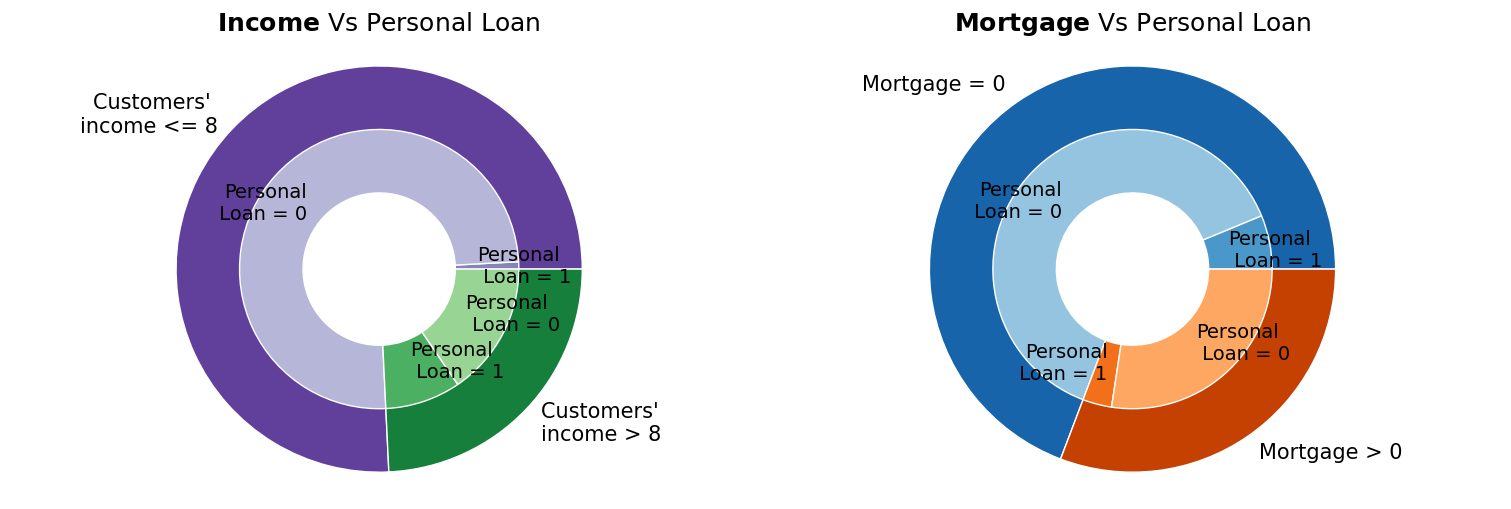



************************************************************************************************************************


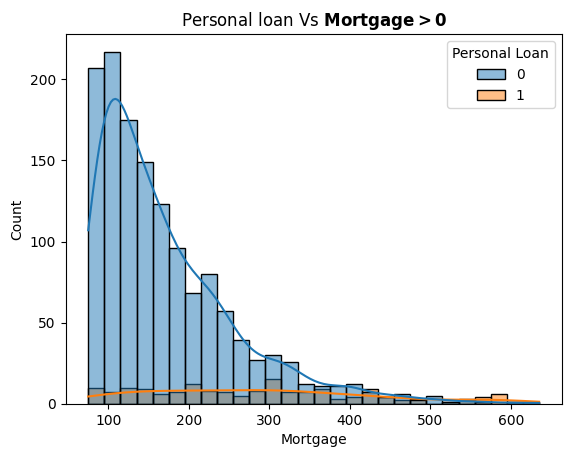

In [29]:
fig = plt.figure(figsize = (15,10),constrained_layout = True, dpi=100)
GridSpec = gridspec.GridSpec(ncols=1, nrows=2, figure= fig)
 
subfigure = fig.add_subfigure(GridSpec[0,:])
# Adding subplots to subfigure 
subplots = subfigure.subplots(1,2)

total_names=[["Customers' \nincome <= 8", "Customers' \nincome > 8"],["Mortgage = 0", "Mortgage > 0"]]
total_size=[[3788,1212],[3462,1538]]
sub_names=["Personal\n Loan = 1","Personal\n Loan = 0","Personal\n Loan = 1","Personal\n Loan = 0"]
sub_size=[[42,3746,438,774],[312,3150,168,1370]]

# Create colors
c1, c2, c3, c4=[plt.cm.Purples, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]
colors = [[c1(0.8), c2(0.8)] ,[c1(0.6), c1(0.4), c2(0.6), c2(0.4)],[c3(0.8), c4(0.8)],[c3(0.6), c3(0.4), c4(0.6), c4(0.4)]]

for i,col in enumerate(['Income','Mortgage']):
    subplots[i].axis('equal')
    pie1, _ = subplots[i].pie(total_size[i], radius=0.8, labels=total_names[i],textprops={'fontsize': 15},
                              colors= colors[i*2])
    plt.setp( pie1, width=0.3, edgecolor='white')
    # Second Ring (Inside)
    pie2, _ = subplots[i].pie(sub_size[i], radius=0.85-0.3, 
    labels=sub_names, labeldistance=0.7,textprops={'fontsize': 14}, colors=colors[i*2+1])
    plt.setp( pie2, width=0.25, edgecolor='white')
    plt.margins(0,0)
    subplots[i].set_title(f'$\\mathbf{{{col}}}$ Vs Personal Loan',fontsize=18)
    
plt.show()

print('\n')
print('*'*120)

sns.histplot(x=df[df['Mortgage']>0]['Mortgage'],hue = df['Personal Loan'],kde=True)
plt.title(f'Personal loan Vs $\\mathbf{{{"Mortgage>0"}}}$')

plt.show()

    - As seen in the pieplot of Income vs. Personal Loan, most customers have a low income <= 8 (about 74.52% of all customers), and among these low-income customers (0.91%) were granted loans but others (99.09%) were not. Also, in customers with income > 8 (about 25.48% of all customers), 35% were granted loans, and the other 65% were not. So, it means more income can increase the chance of being granted loans.
    - As seen in the histplot and pieplot of Mortgage, most customers didn't have any mortgage(Mortgage = 0, about 69.24% of all customers) that 9.01% of these customers were granted loans and 90.99% were not. It means that for being granted loans, Mortgage is not neccessary but is helpful. Also, it shows the importance of other features besides this feature. the rest of customers(30.76% of all customers) have Mortgage >= 75, 10.92% of these customers were granted loans and other 89.08% were not. So, these percentages show that the larger value of a mortage can increase the chance of being granted loans. 

<Figure size 800x500 with 0 Axes>

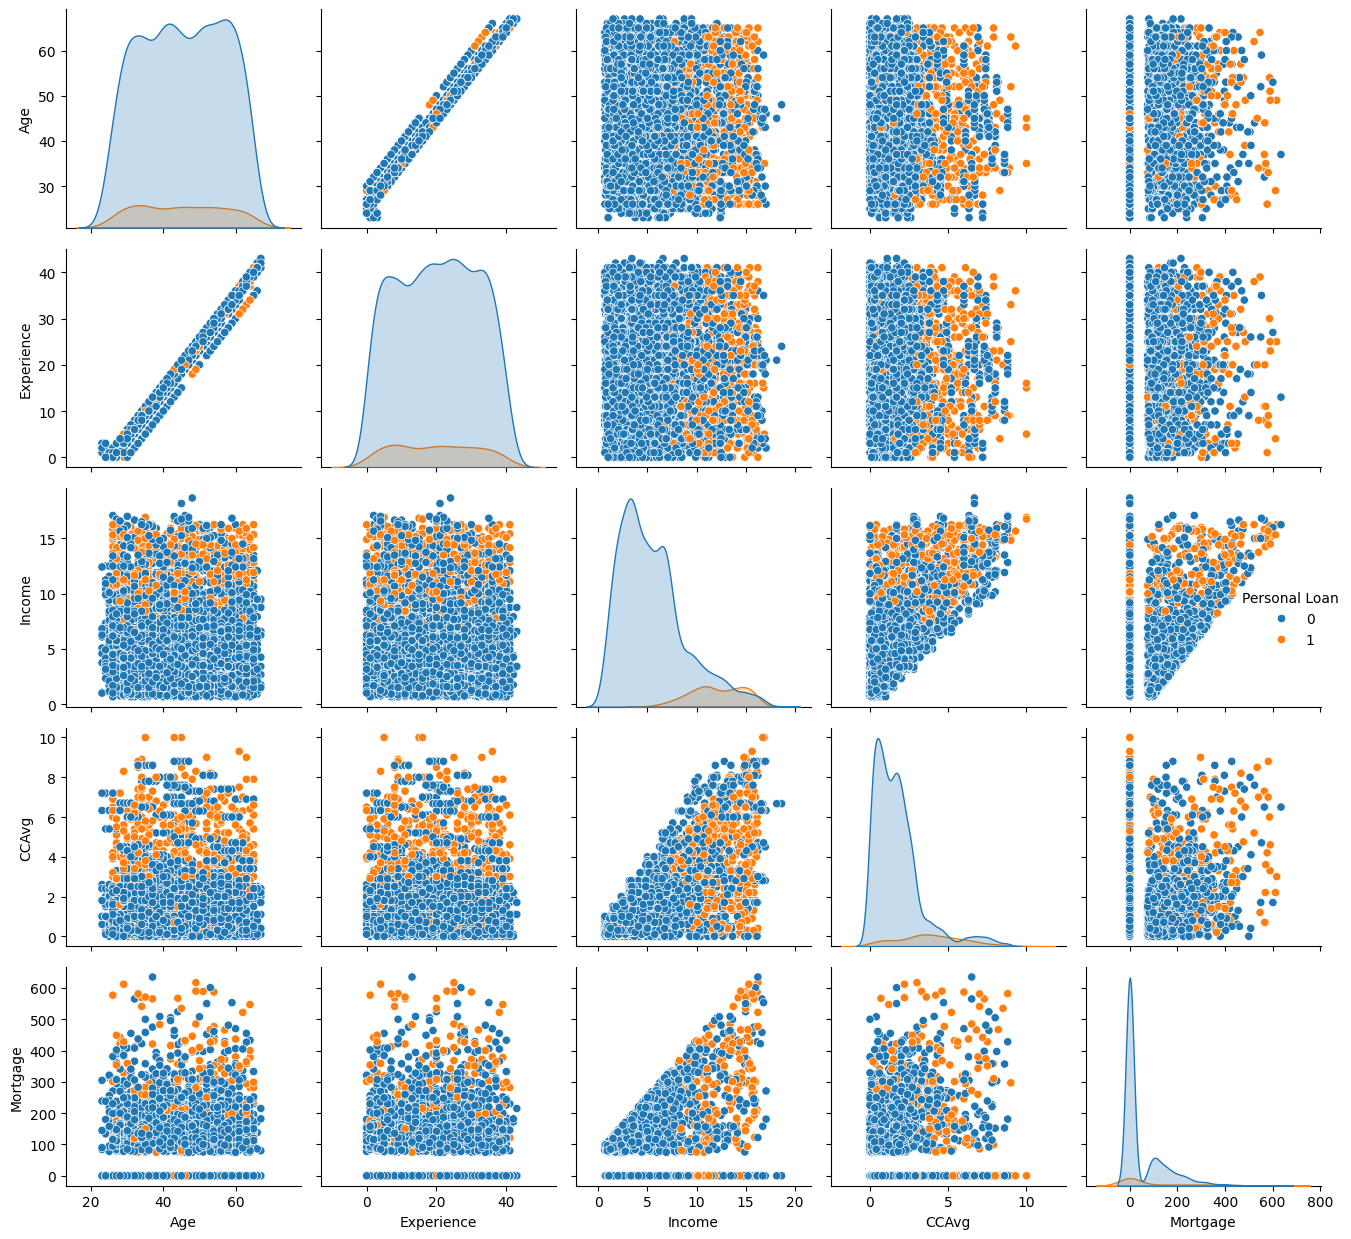

*****************************************************************************************************************************


In [30]:
plt.figure(figsize=(8,5))
sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],hue='Personal Loan')
plt.tight_layout()
plt.show()
print('*'*125)

### Pairplots of continuous features
    - Age : As seen above in the Age-Age plot, customers of any age can be granted loans.
    - The Experience-Age plot shows that by increasing the age, experience increases, and vice versa.
          - The Income-Age plot shows that customers have different incomes at different ages, and income is 
          not dependent on age, and vice versa, but we see that by increasing income at any age, the chance 
          of being granted loans increases.
          - The CCAvg-Age plot shows that customers have different CCAvg values at any age, almost from 25 
          (Age). By increasing the CCAvg, the chance of being granted loans increases.
          - The Mortgage-Age shows that mortgage is not dependent on age; it also shows that by increasing 
          the mortgage the chance of being granted loans increases.
    - Experience : As seen above in the Experience-Experience plot, customers with any Experience can be 
    granted loans.
          - The Experience-Income plot shows that customers with any experience can have different incomes 
          (low or high), and it also shows that by increasing the income, the chance of being granted loans 
          increases.
          - The Experience-CCAvg plot also shows that the experience and the CCAvg are not dependent 
          together, and it shows that increasing CCAvge leads to increase the chance of being granted loans.
    - Income : As seen above in the income-income plot, the chance of being granted loans is higher for high-
    income customers than low-income customers.
          - The CCAvg-Income plot shows that by increasing income, CCAvg can increase, so by increasing each 
          of them, the chance of being granted loans increases.
          - The Mortgage-Income plot shows that by increasing income, Mortgage can increase, so by increasing 
          each of them, the chance of being granted loans increases.
    - Mortgage-Mortgage plot shows that the number of customers that have a mortgage of 0(customers without 
    mortgage) is greater than the number of customers with a mortgage > 0 , but the ratio of granted loans 
    (number of customers granted loans/number of customers) in a mortgage > 0 is greater.(ratio of granted 
    loans in mortgage = 0 is 9.01% , ratio of granted loans in mortgage > 0 is 10.92%)
    - CCAvg-CCAvg plot shows that the number of customers with CCAvg<=3 is greater than the number of them 
    with CCAvg >3, but the ratio of granted loans in CCAvg > 3 is greater than ratio in CCAvg <= 3(ratio of 
    granted loans in CCAvg <= 3 is 4.023%, ratio of granted loans in CCAvg > 3 is 36.87%)
    - Income-Income plot shows that the number of customers with lower incom (Income <= 8) is greater than 
    the number of them with high income (Income > 8), but the ratio of granted loans in Income > 8 is greater 
    than ratio in Income <=8 (ratio of granted loans in Income <= 8 is 0.91%, ratio of granted loans in 
    Income > 8 is 35%)

,Personal Loan,Income,CCAvg,Mortgage
Personal Loan,1.000000,0.502462,0.366889,0.142095
Income,0.502462,1.000000,0.645984,0.206806
CCAvg,0.366889,0.645984,1.000000,0.109905
Mortgage,0.142095,0.206806,0.109905,1.000000


,Income,CCAvg,Mortgage
Income,1.000000,0.645984,0.206806
CCAvg,0.645984,1.000000,0.109905
Mortgage,0.206806,0.109905,1.000000


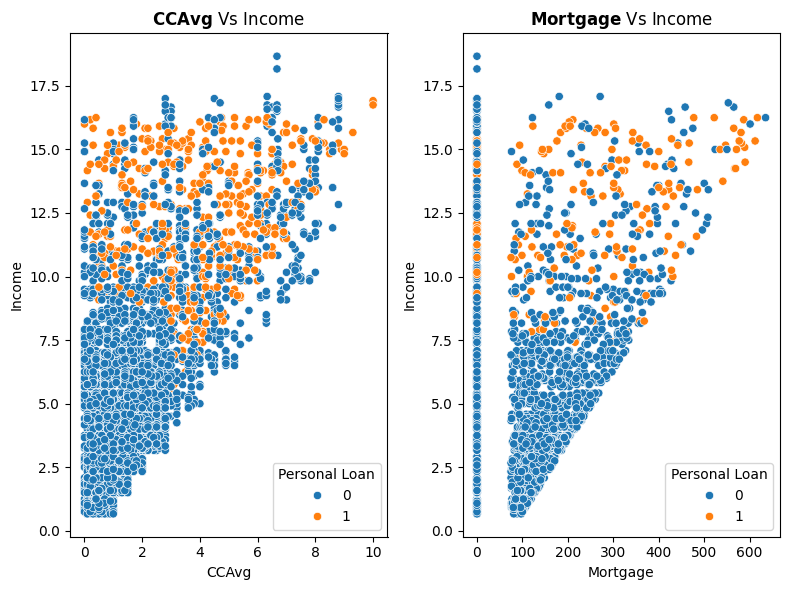

In [31]:
display(df[['Personal Loan','Income','CCAvg','Mortgage']].corr())
display(df[['Income','CCAvg','Mortgage']].corr())


plt.figure(figsize=(8,6))
for i,col in enumerate(['CCAvg','Mortgage']):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df, x=col,y='Income',hue='Personal Loan')
    plt.title(f"$\\mathbf{{{col}}}$ Vs Income")
plt.tight_layout()
plt.show()

## Dependency between continuous features and the target
### Income-Personal_Loan, CCAvg-Personal_Loan, Mortgage-Personal_Loan
    - By increasing each of Income, CCAvg and Mortgage the chance of being granted loans can increase.
## Dependency between continuous features
### Mortgage-Income, CCAvg-Income
    -By increasing Income, Mortgage and CCAvg can increase.

In [32]:
fig = px.scatter_3d(df, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')
fig.show()
####################################################################
fig = px.scatter_3d(df, x='Mortgage', y='Income', z='CD Account',
              color='Personal Loan')
fig.show()

### 3D plots of Income-Mortgage-CD_Account and Income-CCAvg-CD_Account
    - As seen above, the ratio of the number of yellow dots in the upper level (CD Account = 1) is higher than the ratio of the number of yellow dots in the lower level (CD Account = 0), and it shows that customers with a CD Account = 1 have a high chance of being granted loans. (ratio of the upper level = number of yellow dots in the upper level/number of all dots in the upper level)
    - From "income = 8" the number of yellow dots (Personal Loan=1) is greater than blue dots.

## Dependency between Descrete features and the target
### CD account-Personal_Loan
    - having a CD account can increase the chance of being granted loans.

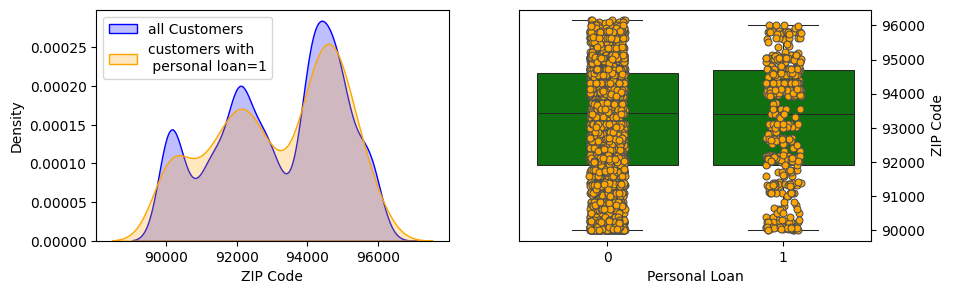

In [33]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(df1['ZIP Code'],fill=True,color='blue',label='all Customers')
sns.kdeplot(df1[df1['Personal Loan']==1]['ZIP Code'],fill=True,color='orange',label='customers with\n personal loan=1')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
ax = sns.boxplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="green", linewidth=0.75)
ax = sns.stripplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="orange",linewidth=0.75)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

    - As shown in these plots, the number (or distribution) of customers who are granted loans in various locations (different zipcodes) is proportional to the number (or distribution) of all customers in those locations. Also, we see that customers in different locations can be granted loans.

In [34]:
fig = px.scatter_mapbox(
    df1 ,
    lat="Lat",
    lon="Lon",
    hover_name="County",
    color = "Personal Loan",
    color_continuous_scale = ["crimson",'darkblue'],
    hover_data=['Place','Income' , 'Mortgage' , "CreditCard"],
    zoom=10,
    height=400
    
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -200, "east": 80, "south": -20, "north": 90})
fig.show()

### Map plot 
    - There is some information about customers according to their zipcode in this map plot. You can see some information like county_name, place_name, income, and so on by zooming out the map plot and putting up your mouse cursor at each point.
    - We see that the number of customers in some counties, like 'Los Angeles', 'San Diego', 'Santa Clara', and 'Almeda', is higher than other counties in California. Also, the number of customers that were granted loans in these counties is higher than other counties.